Data Pre-Processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)
# Create Dataframe
df=pd.read_csv("https://raw.githubusercontent.com/entbappy/US-Visa-Approval-Prediction/main/notebook/Visadataset.csv")
# Print shape of dataset
print(df.shape)

(25480, 12)


Data Cleaning

In [2]:
##Handling Missing values
##these are the features with nan value
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

In [3]:
features_with_na

[]

.There are no null values in the dataset

In [4]:
#Handling Duplicates

df.duplicated().sum()

0

,.No Duplicates in the dataset

In [5]:
#Remove case_id from the dataset as it cannot used in Model Training
df.drop('case_id', inplace=True, axis=1)

.Feature Engineering

In [6]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [7]:
# importing date class from datetime module
from datetime import date
  
# creating the date object of today's date
todays_date = date.today()
current_year= todays_date.year

In [8]:
current_year

2024

In [9]:
#Subtract current year with year of estab to get company's age

df['company_age'] = current_year-df['yr_of_estab']

In [10]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,17
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,22
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,16
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,127
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,19


In [11]:
df.drop('yr_of_estab', inplace=True, axis=1)

.Type of Features

In [12]:
#Numeric Features
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 3


In [13]:
#Categorical Features
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))


Num of Categorical Features : 8


In [14]:
#Discrete features
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))


Num of Discrete Features : 0


In [15]:
#Continues Features
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 3


In [16]:
#Split Dataframe to X and y
#Here we set a variable X i.e, independent columns, and a variable y i.e, dependent column as the “Case_Status” column.

In [17]:
X = df.drop('case_status', axis=1)
y = df['case_status']

In [18]:
X.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,company_age
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,17
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,22
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,16
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,127
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,19


In [19]:
y.head()

0       Denied
1    Certified
2       Denied
3       Denied
4    Certified
Name: case_status, dtype: object

In [20]:
#Manual encoding target column
# If the target column has Denied it is encoded as 1 others as 0
y= np.where(y=='Denied', 1,0)

In [21]:
y[1]

0

.Feature Transformation

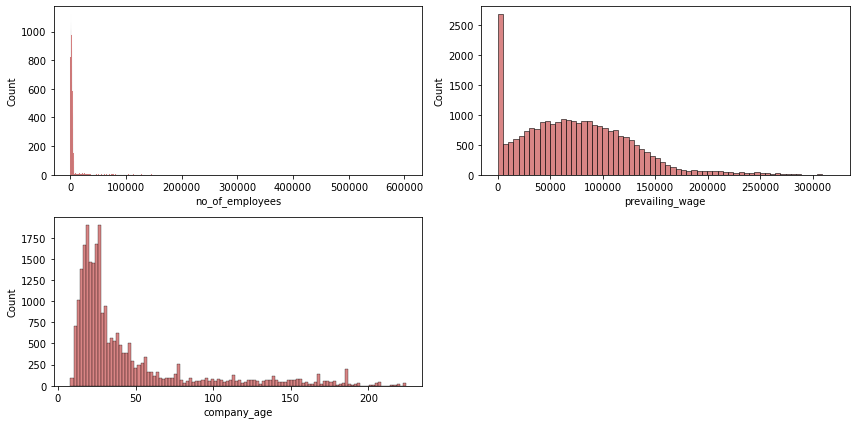

In [22]:
# distribution of data before scaling
plt.figure(figsize=(12, 6))
for i, col in enumerate(['no_of_employees','prevailing_wage','company_age']):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=X[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

.No of employees and Copmany age column is skewed
.Apply a power transform featurewise to make data more Gaussian-like.

Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

Currently, PowerTransformer supports the Box-Cox transform and the Yeo-Johnson transform.

What is Skewness ?

Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed. Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution. A normal distribution has a skew of zero.

In [23]:
# Check Skewness
X[continuous_features].skew(axis=0, skipna=True)

no_of_employees    12.265260
prevailing_wage     0.755776
company_age         2.037301
dtype: float64

.Positiviely Skewed : company_age, no_of_employees.
.We can handle outliers and then check the skewness.

In [24]:
#Apply Power Transformer to Check if it can reduces the outliers
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
transform_features = ['company_age', 'no_of_employees']
X_copy = pt.fit_transform(X[transform_features])

In [25]:
X_copy = pd.DataFrame(X_copy, columns=transform_features)

In [26]:
X_copy

,company_age,no_of_employees
0,-0.952162,1.517300
1,-0.462942,0.030912
2,-1.075820,2.885076
3,1.629178,-1.343550
4,-0.733953,-0.432287
...,...,...
25475,-1.075820,0.079917
25476,-0.838640,0.235747
25477,1.547445,-0.413885
25478,1.683834,-0.111949


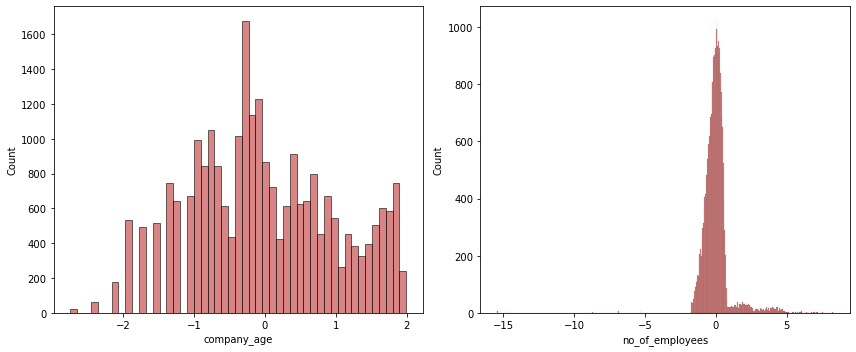

In [27]:
plt.figure(figsize=(12, 5))
for i, col in enumerate(transform_features):
    plt.subplot(1, 2, i+1)
    sns.histplot(x=X_copy[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [28]:
#Checking Skewness
X_copy.skew(axis=0, skipna=True)

company_age        0.103264
no_of_employees    0.399339
dtype: float64

.Here Yeo-Johnson is used and it supports both positive or negative data for transformation.
.So Power Transformer with yeo-johnson can be used.

In [29]:
for feature in cat_features:
    print(feature,':', df[feature].nunique())

continent : 6
education_of_employee : 4
has_job_experience : 2
requires_job_training : 2
region_of_employment : 5
unit_of_wage : 4
full_time_position : 2
case_status : 2


####Feature Encoding and Scaling

One Hot Encoding for Columns which had lesser unique values and not ordinal

.One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.



Ordinal Encoding for Columns which has many unique categories

.Ordinal encoding is used here as label encoder is supported for column transformer.
.Ordinal encoding is used for Ordinal Variable. Variable comprises a finite set of discrete values with a ranked ordering between values.


Standard Scaler
.Standardize features by removing the mean and scaling to unit variance.


Power Transformer

.Power transforms are a technique for transforming numerical input or output variables to have a Gaussian or more-Gaussian-like probability distribution.


In [30]:
#Selecting number features for preprocessing
num_features = list(X.select_dtypes(exclude="object").columns)

In [31]:
num_features

['no_of_employees', 'prevailing_wage', 'company_age']

Preprocessing using Column Transformer

In [32]:
# Create Column Transformer with 3 types of transformers
or_columns = ['has_job_experience','requires_job_training','full_time_position','education_of_employee']
oh_columns = ['continent','unit_of_wage','region_of_employment']
transform_columns= ['no_of_employees','company_age']

from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()

transform_pipe = Pipeline(steps=[
    ('transformer', PowerTransformer(method='yeo-johnson'))
])

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, oh_columns),
        ("Ordinal_Encoder", ordinal_encoder, or_columns),
        ("Transformer", transform_pipe, transform_columns),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)


In [33]:
X = preprocessor.fit_transform(X)

In [34]:
X

array([[ 0.        ,  1.        ,  0.        , ...,  0.38666657,
        -1.39853722, -0.65122993],
       [ 0.        ,  1.        ,  0.        , ..., -0.14228155,
         0.1698353 , -0.53321103],
       [ 0.        ,  1.        ,  0.        , ...,  1.69498375,
         0.91907852, -0.6748337 ],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.19871259,
         1.36027953,  1.63833662],
       [ 0.        ,  1.        ,  0.        , ..., -0.16387483,
         0.22150859,  2.18122353],
       [ 0.        ,  1.        ,  0.        , ..., -0.10805575,
        -0.06776315,  0.45814768]])

Classification

In [35]:
from imblearn.combine import SMOTETomek, SMOTEENN

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTEENN(random_state=42,sampling_strategy='minority' )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X, y)

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
from sklearn.model_selection import  train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

NameError: name 'X_res' is not defined